# API para servir las features de entrenamiento dado un Id

### Para el desarrollo de esta API se implementó un micro servicio de Flask.

In [1]:
from flask import Flask, request, jsonify 
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import sys
sys.path.append('/home')
from aimodels.universal_function import *

In [2]:
path = "wasbs://data@stg0ia0prod0001.blob.core.windows.net/data_spark/"

In [3]:
spark = spark_init(name = "Test")

In [4]:
data = spark.read.parquet(path)

#### En esta celda decido uasar el archivo parquet que generé MLE_challenge_Features_engineering_Notebook_1.ipynb para no interferir con el archivo de entrenamiento train_model.csv a pesar que tiene la misma información que el parquet, es posible que en algún momento no tengamos acceso a este por ser totalmente del dominio de los Científicos de Datos.

#### Entonces aprovechamos las bondades de spark para leer el parquet y selecciona justo las columnas que necesitaremos antes de invocar a la API.

In [5]:
data = data.select("id","nb_previous_loans","avg_amount_loans_previous","age","years_on_the_job","flag_own_car")

#### Una vez levantada la API, usamos una petición Post para pasa el Id a lo que la API responde con un json como resultado de las features solicitadas. Una observación en este punto es que se arma una consulta de spark con el Id leído y el resultado puede trnasformarse a un formato pandas para su procesamiento, la transformación tiene una demora imperceptible que valdrá la pena porque si continuamos con sentencias puras de spark tendríamos que reescribir una sóla sentencia de pandas en varias de spark.

In [6]:
app = Flask(__name__)

@app.route('/features', methods=['GET', 'POST'])
def features():
    if request.method == 'GET':
        return "Intente con un método Post e incorpore el id"
    else:
        request_data = request.get_json()
        itemId = request_data['id']
        dataId = data.where("id="+str(itemId)).toPandas()[-1:].values
        result = {   
                     'nb_previous_loans': dataId[0][1],
                     'avg_amount_loans_previous': dataId[0][2],
                     'age': dataId[0][3],
                     'years_on_the_job': dataId[0][4],
                     'flag_own_car': dataId[0][5]
                 }
        return result
        
app.run(debug=False, host='10.3.0.4', port='60004')

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://10.3.0.4:60004/ (Press CTRL+C to quit)
192.168.7.2 - - [31/Jan/2022 18:16:28] "POST /features HTTP/1.1" 200 -
10.3.0.4 - - [31/Jan/2022 18:17:18] "POST /features HTTP/1.1" 200 -


#### Acá una muestra:

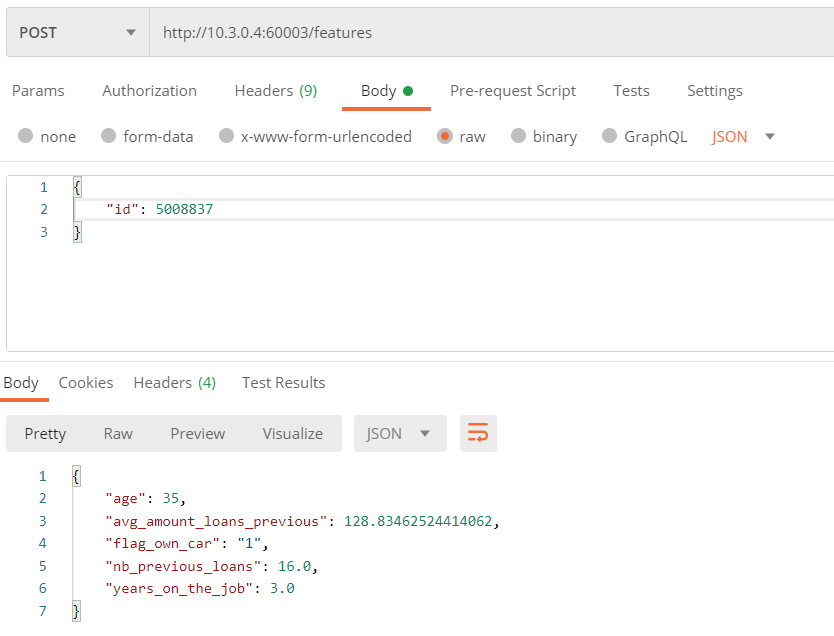

#### Si comprobamos con el archivo de entrenamiento:

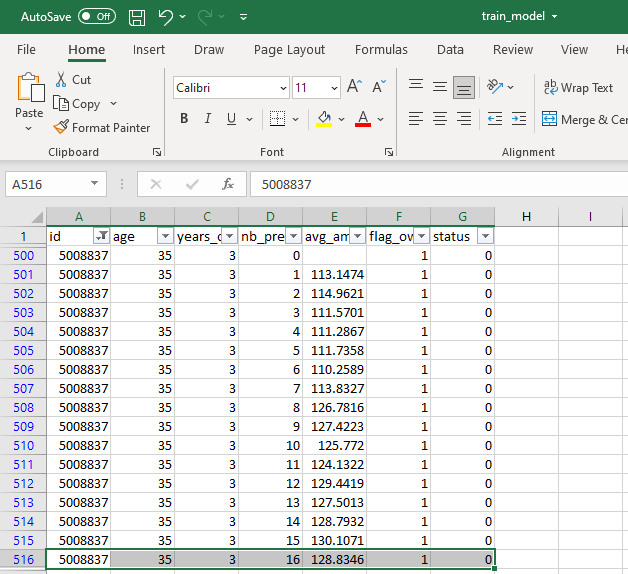